In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

https://medium.com/mlearning-ai/learning-xor-with-pytorch-c1c11d67ba8e

regular neural network

In [34]:
# create data
Xs = torch.Tensor([[0., 0.],
               [0., 1.],
               [1., 0.],
               [1., 1.]])

y = torch.Tensor([0., 5., 5., 0.]).reshape(Xs.shape[0], 1)

In [35]:
class XOR(nn.Module):
    def __init__(self):
        super(XOR, self).__init__()
        self.linear = nn.Linear(2, 2)
        self.Sigmoid = nn.Sigmoid()
        self.linear2 = nn.Linear(2, 1)

    def forward(self, input):
        x = self.linear(input)
        sig = self.Sigmoid(x)
        yh = self.linear2(sig)
        return yh

In [36]:
xor_network = XOR()

epochs = 1000
mseloss = nn.MSELoss()
optimizer = torch.optim.Adam(xor_network.parameters(), lr = 0.03)
all_losses = []
current_loss = 0
plot_every = 50

for epoch in range(epochs):
    # input training example and return the prediction
    yhat = xor_network.forward(Xs)
    
    # calculate MSE loss
    loss = mseloss(yhat, y)
    
    # backpropogate through the loss gradiants
    loss.backward()
    
    # update model weights
    optimizer.step()

    # remove current gradients for next iteration
    optimizer.zero_grad()
    
    # append to loss
    current_loss += loss
    
    if epoch % plot_every == 0:
        all_losses.append((current_loss / plot_every).detach())
        current_loss = 0

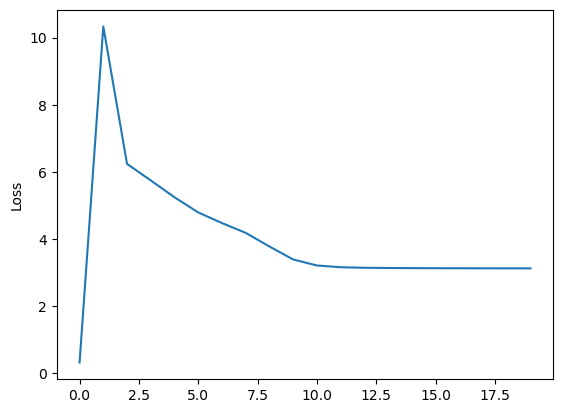

In [37]:
import matplotlib.pyplot as plt
plt.plot(all_losses)
plt.ylabel('Loss')
plt.show()

In [38]:
# show weights and bias
for name, param in xor_network.named_parameters():
    if param.requires_grad:
        print(name, param.data)

linear.weight tensor([[-8.7000,  3.6630],
        [ 9.5532,  7.4493]])
linear.bias tensor([-2.3360, -2.1373])
linear2.weight tensor([[3.1668, 3.1007]])
linear2.bias tensor([-0.5980])


In [39]:
# test input
# input = torch.tensor([0., 1.])
input = torch.Tensor([[0., 0.],
               [0., 1.],
               [1., 0.],
               [1., 1.]])
out = xor_network(input)
print(out)

tensor([[0.0085],
        [4.9904],
        [2.5010],
        [2.5048]], grad_fn=<AddmmBackward0>)


In [28]:
x1 = Xs[:,0].unsqueeze(dim = 1)
x2 = Xs[:,1].unsqueeze(dim = 1)
y = torch.Tensor([0., 5., 5., 0.]).reshape(Xs.shape[0], 1)
print(x1)
print(x2)

tensor([[0.],
        [0.],
        [1.],
        [1.]])
tensor([[0.],
        [1.],
        [0.],
        [1.]])


In [29]:
class context(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1,2)
    def forward(self, x1):
        w = self.linear(x1)
        return w
        
class function(nn.Module):
    def __init__(self):
        super().__init__()
        self.sig1 = nn.Sigmoid()

    def forward(self, x2, w):
        w1 = w[:,0].unsqueeze(dim=1)
        w2 = w[:,1].unsqueeze(dim=1)
        h = self.sig1(x2 * w1)
        z = h * w2
        return z

In [30]:
context_net = context()
function_net = function()

epochs = 1000
mseloss = nn.MSELoss()
# only context network has fixed weights that need to be trained
optimizer = torch.optim.Adam(context_net.parameters(), lr = 0.03)
all_losses = []
current_loss = 0
plot_every = 50

for epoch in range(epochs):
    # weight from context network
    w = context_net.forward(x1)
    
    # enter weight and the second input to the function network
    yhat = function_net.forward(x2, w)
    print(yhat)
    print(y)

    # calculate MSE loss
    loss = mseloss(yhat, y)
    print("loss", loss.item())

    # backpropogate through the loss gradiants
    loss.backward()

    # update model weights
    optimizer.step()

    # remove current gradients for next iteration
    optimizer.zero_grad()

    # append to loss
    current_loss += loss
    if epoch % plot_every == 0:
        all_losses.append((current_loss / plot_every).detach())
        current_loss = 0

tensor([[-0.3460],
        [-0.3961],
        [-0.8386],
        [-1.1990]], grad_fn=<MulBackward0>)
tensor([[0.],
        [5.],
        [5.],
        [0.]])
loss 16.19124412536621
tensor([[-0.3310],
        [-0.3741],
        [-0.8086],
        [-1.1360]], grad_fn=<MulBackward0>)
tensor([[0.],
        [5.],
        [5.],
        [0.]])
loss 16.005260467529297
tensor([[-0.3160],
        [-0.3525],
        [-0.7786],
        [-1.0742]], grad_fn=<MulBackward0>)
tensor([[0.],
        [5.],
        [5.],
        [0.]])
loss 15.823868751525879
tensor([[-0.3010],
        [-0.3313],
        [-0.7487],
        [-1.0135]], grad_fn=<MulBackward0>)
tensor([[0.],
        [5.],
        [5.],
        [0.]])
loss 15.647077560424805
tensor([[-0.2860],
        [-0.3107],
        [-0.7188],
        [-0.9542]], grad_fn=<MulBackward0>)
tensor([[0.],
        [5.],
        [5.],
        [0.]])
loss 15.474885940551758
tensor([[-0.2711],
        [-0.2905],
        [-0.6889],
        [-0.8962]], grad_fn=<MulBa

tensor([[2.1592],
        [4.1469],
        [4.2132],
        [0.3119]], grad_fn=<MulBackward0>)
tensor([[0.],
        [5.],
        [5.],
        [0.]])
loss 1.526572823524475
tensor([[2.1601],
        [4.1492],
        [4.2183],
        [0.3108]], grad_fn=<MulBackward0>)
tensor([[0.],
        [5.],
        [5.],
        [0.]])
loss 1.5243512392044067
tensor([[2.1610],
        [4.1516],
        [4.2234],
        [0.3097]], grad_fn=<MulBackward0>)
tensor([[0.],
        [5.],
        [5.],
        [0.]])
loss 1.5221612453460693
tensor([[2.1618],
        [4.1538],
        [4.2285],
        [0.3086]], grad_fn=<MulBackward0>)
tensor([[0.],
        [5.],
        [5.],
        [0.]])
loss 1.5200024843215942
tensor([[2.1626],
        [4.1560],
        [4.2335],
        [0.3075]], grad_fn=<MulBackward0>)
tensor([[0.],
        [5.],
        [5.],
        [0.]])
loss 1.5178735256195068
tensor([[2.1634],
        [4.1582],
        [4.2384],
        [0.3064]], grad_fn=<MulBackward0>)
tensor([[0.],


tensor([[2.0665],
        [4.0710],
        [4.8399],
        [0.1824]], grad_fn=<MulBackward0>)
tensor([[0.],
        [5.],
        [5.],
        [0.]])
loss 1.2981054782867432
tensor([[2.0662],
        [4.0705],
        [4.8408],
        [0.1822]], grad_fn=<MulBackward0>)
tensor([[0.],
        [5.],
        [5.],
        [0.]])
loss 1.2978861331939697
tensor([[2.0658],
        [4.0700],
        [4.8418],
        [0.1819]], grad_fn=<MulBackward0>)
tensor([[0.],
        [5.],
        [5.],
        [0.]])
loss 1.297668695449829
tensor([[2.0655],
        [4.0695],
        [4.8427],
        [0.1817]], grad_fn=<MulBackward0>)
tensor([[0.],
        [5.],
        [5.],
        [0.]])
loss 1.2974525690078735
tensor([[2.0651],
        [4.0690],
        [4.8436],
        [0.1815]], grad_fn=<MulBackward0>)
tensor([[0.],
        [5.],
        [5.],
        [0.]])
loss 1.2972381114959717
tensor([[2.0648],
        [4.0685],
        [4.8445],
        [0.1813]], grad_fn=<MulBackward0>)
tensor([[0.],


tensor([[2.0155],
        [4.0011],
        [4.9760],
        [0.1318]], grad_fn=<MulBackward0>)
tensor([[0.],
        [5.],
        [5.],
        [0.]])
loss 1.2695214748382568
tensor([[2.0154],
        [4.0010],
        [4.9762],
        [0.1317]], grad_fn=<MulBackward0>)
tensor([[0.],
        [5.],
        [5.],
        [0.]])
loss 1.2694799900054932
tensor([[2.0154],
        [4.0009],
        [4.9763],
        [0.1315]], grad_fn=<MulBackward0>)
tensor([[0.],
        [5.],
        [5.],
        [0.]])
loss 1.2694382667541504
tensor([[2.0153],
        [4.0008],
        [4.9765],
        [0.1314]], grad_fn=<MulBackward0>)
tensor([[0.],
        [5.],
        [5.],
        [0.]])
loss 1.2693970203399658
tensor([[2.0152],
        [4.0008],
        [4.9767],
        [0.1313]], grad_fn=<MulBackward0>)
tensor([[0.],
        [5.],
        [5.],
        [0.]])
loss 1.2693558931350708
tensor([[2.0152],
        [4.0007],
        [4.9768],
        [0.1311]], grad_fn=<MulBackward0>)
tensor([[0.],

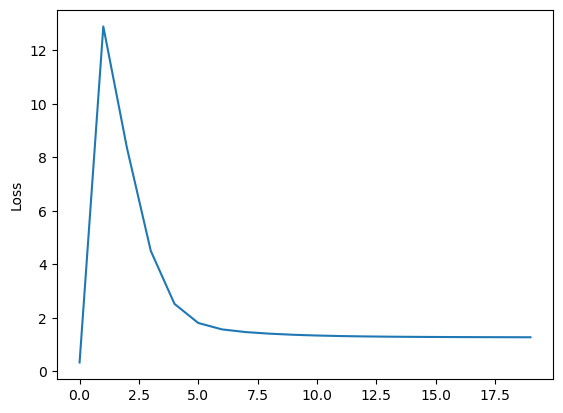

[tensor(0.3238),
 tensor(12.8984),
 tensor(8.3392),
 tensor(4.5017),
 tensor(2.5168),
 tensor(1.8024),
 tensor(1.5622),
 tensor(1.4614),
 tensor(1.4022),
 tensor(1.3614),
 tensor(1.3328),
 tensor(1.3128),
 tensor(1.2991),
 tensor(1.2895),
 tensor(1.2829),
 tensor(1.2780),
 tensor(1.2744),
 tensor(1.2716),
 tensor(1.2693),
 tensor(1.2674)]

In [31]:
import matplotlib.pyplot as plt
plt.plot(all_losses)
plt.ylabel('Loss')
plt.show()

all_losses

In [32]:
# show weights and bias
for name, param in context_net.named_parameters():
    if param.requires_grad:
        print(name, param.data)

linear.weight tensor([[-9.5769],
        [ 5.9607]])
linear.bias tensor([5.1408, 4.0190])


In [33]:
x1 = Xs[:,0].unsqueeze(dim = 1)
x2 = Xs[:,1].unsqueeze(dim = 1)
print(x1)
print(x2)

w = context_net(x1)
out = function_net(x2,w)
out.round()

tensor([[0.],
        [0.],
        [1.],
        [1.]])
tensor([[0.],
        [1.],
        [0.],
        [1.]])


tensor([[2.],
        [4.],
        [5.],
        [0.]], grad_fn=<RoundBackward0>)

In [ ]:
# the error does not drop to 0, why?
# unit?